In [1]:
# This code generates Figures 5,6, and 7

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Feb  2 15:14:03 2020

@author: vicky
"""
# add this: `%matplotlib inline` in the console  for printing the plot


import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import math
from time import time as tm
import warnings

import numba
from numba import jit

np.random.seed(0)

#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
from SpikingNetFunction import *
from RateNetFunctions import *
from DefaultParamsN5e3 import *

runsims=True

Time to generate connections: 0.81 sec.


# Input params



In [3]:

# Perturbations to each population

Ne1=int(Ne/2)

sigma=Xe0/20


ue=sigma*np.zeros(Ne)
ve=sigma*np.zeros(Ne)
ui=sigma*np.zeros(Ni)
vi=sigma*np.zeros(Ni)

ue[:Ne1]=sigma
ve[Ne1:]=-sigma

MMTrial=numtrials-10

# Whether the U and V stimuli are on/off
uon=np.zeros(numtrials)
von=np.zeros(numtrials)

# Matches
uon[:]=2*np.random.rand(numtrials)#np.random.randn(numtrials)
von[:]=uon[:]

# Mismatches
uon[MMTrial]=1
von[MMTrial]=0

# uon[-10]=0
# von[-10]=1


# Input perturbations
Xe=Xe0+np.outer(ue,uon)+np.outer(ve,von)
Xi=Xi0+np.outer(ui,uon)+np.outer(vi,von)



# Spiking sim

In [4]:
fname1='./MatchMisMatchSpikeSim_dataE1E2t_N'+str(int(N/1000))+'e3.npy'

if runsims:
  Jei=Jei0.copy()
  Jii=Jii0.copy()
  startsims = tm()
  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    MeanIee,MeanIei,MeanIie,MeanIii,AlleRates,AlliRates,IeeRec,IeiRec,IexRec,VeRec,SeRec,SiRec=MultiTrialSpikingNet0(Jee,Jei0,Jie,Jii0,Xe,Xi,taum,EL,Vth,Vre,DeltaT,VT,Vlb,taue,taui,r0e,r0i,tauSTDP,etae,etai,eiPlast,iiPlast,trialrecord,numerecord,numirecord,Nt,dt,Nburn,maxns,dtRecord)
  simstime = tm()-startsims
  print('Time for simulations: %.2f min'%(simstime/60))    
  print('Time per sec: %.2f sec'%(1000*(simstime)/(T*N)))
  ########################################################### save data ###########################################################   
  with open(fname1, 'wb') as f:
    np.save(f, MeanIee)
    np.save(f, MeanIei)
    np.save(f, MeanIie)
    np.save(f, MeanIii)
    np.save(f, Xe)
    np.save(f, Xi)
    np.save(f, AlleRates)
    np.save(f, AlliRates)
    np.save(f, VeRec)
    np.save(f, SeRec)
    np.save(f, SiRec)
    np.save(f, simstime)    

else:
  ########################################################### load data ########################################################### 
  with open(fname1, 'rb') as f:
    MeanIee = np.load(f)
    MeanIei = np.load(f)
    MeanIie = np.load(f)
    MeanIii = np.load(f)
    Xe = np.load(f)
    Xi = np.load(f)
    AlleRates = np.load(f)
    AlliRates = np.load(f)
    VeRec = np.load(f)
    SeRec = np.load(f)
    SiRec = np.load(f) 
    simstime = np.load(f)

# Plots

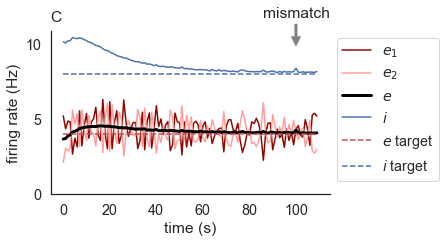

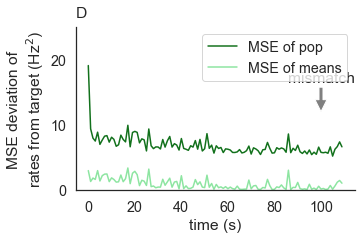

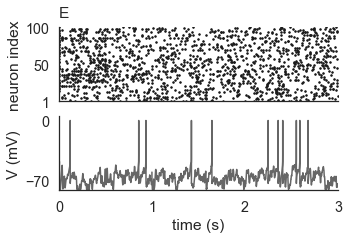

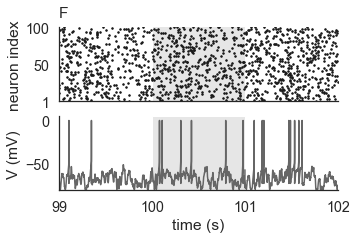

[]

In [5]:
# Make plots for Fig 5


import seaborn as sns
from matplotlib.patches import Rectangle

sns.set(context='notebook',style='white',font_scale=1.3)


# Rates averaged over each trial
reSpikeT=np.mean(AlleRates,axis=1)
re1SpikeT=np.mean(AlleRates[:,:Ne1],axis=1)
re2SpikeT=np.mean(AlleRates[:,Ne1:],axis=1)
riSpikeT=np.mean(AlliRates,axis=1)
rSpikeT=np.array([reSpikeT,riSpikeT])


AllRatesSpike=np.block([AlleRates,AlliRates])
r0Spike=np.block([r0e+np.zeros_like(AlleRates),r0i+np.zeros_like(AlliRates)])
MSEPopSpike=np.mean((AllRatesSpike-r0Spike)**2,axis=1)
MSEMeanSpike=(.4*(re1SpikeT-r0e)**2+.4*(re2SpikeT-r0e)**2+.2*(riSpikeT-r0i)**2)

MMcolor=[.9,.9,.9]

# Raster and V plot params
NePlot=100
msize=3
NumTrialsPlot=3

TrialsPlot1=range(0,3)
TrialsPlot2=range(29,32)
whichVneuron=2



plt.figure(figsize=(5, 3))
plt.plot(np.arange(numtrials)*T/1000,1000*re1SpikeT,color=sns.color_palette('dark')[3], label=r'$e_1$')
plt.plot(np.arange(numtrials)*T/1000,1000*re2SpikeT,color=sns.color_palette('pastel')[3], label=r'$e_2$')
plt.plot(np.arange(numtrials)*T/1000,1000*reSpikeT,color=[0,0,0],linewidth=3, label=r'$e$')
plt.plot(np.arange(numtrials)*T/1000,1000*riSpikeT,color=sns.color_palette()[0], label=r'$i$')
plt.plot(np.arange(numtrials)*T/1000,1000*r0e+np.zeros(numtrials),'--',color=sns.color_palette()[3], label=r'$e$ target')
plt.plot(np.arange(numtrials)*T/1000,1000*r0i+np.zeros(numtrials),'--',color=sns.color_palette()[0], label=r'$i$ target')
plt.annotate('mismatch', xy=(MMTrial,9.75), xytext=(0, 30),textcoords='offset points',ha='center',
             arrowprops=dict(facecolor='gray', shrink=0.0))
sns.despine()
plt.xlabel('time (s)')
plt.ylabel('firing rate (Hz)')
plt.yticks([0,5,10])
plt.ylim(bottom=0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('C',loc='left',pad=10)


plt.figure(figsize=(5, 3))
plt.plot(np.arange(numtrials)*T/1000,1e6*MSEPopSpike,color=sns.color_palette('dark')[2],label='MSE of pop')
plt.plot(np.arange(numtrials)*T/1000,1e6*MSEMeanSpike,color=sns.color_palette('pastel')[2],label='MSE of means')
plt.annotate('mismatch', xy=(MMTrial,12), xytext=(0, 30),textcoords='offset points',ha='center',
             arrowprops=dict(facecolor='gray', shrink=0.0))
sns.despine()
plt.xlabel('time (s)')
plt.ylabel('MSE deviation of\n'+r'rates from target (Hz$^2$)')
plt.ylim(bottom=-.1,top=25)
plt.legend()
plt.title('D',loc='left',pad=10)


plt.subplots(figsize=(5,3))
plt.subplot(2,1,1)
for j in TrialsPlot1:
    Inds=np.where(np.logical_and(SeRec[j,1,:]<NePlot , SeRec[j,0,:]>0))
    plt.plot((SeRec[j,0,Inds]+trialrecord[j]*T)/1000,SeRec[j,1,Inds]+1,'k.',markersize=msize)
#plt.xlabel('time (s)')
plt.ylabel('neuron index')    
plt.xlim([0,3])
plt.ylim([1,NePlot])
plt.xticks([])
plt.yticks([1, 50, 100])
plt.title('E',loc='left',pad=10)

#plt.figure(figsize=(5,1.5))
plt.subplot(2,1,2)
for j in TrialsPlot1:
    Vplot=VeRec[j,whichVneuron,:]
    Vplot[Vplot>-40]=0
    plt.plot((np.arange(0,T,dt)+T*trialrecord[j])/1000,Vplot,color=[.4,.4,.4])
plt.xlabel('time (s)')
plt.ylabel('V (mV)')    
plt.xlim([0,3])
sns.despine()
plt.ylim([-81,5])
plt.xticks([0,1,2,3])
plt.yticks([-70,0])  



plt.subplots(figsize=(5,3))
plt.subplot(2,1,1)
for j in TrialsPlot2:
    Inds=np.where(np.logical_and(SeRec[j,1,:]<NePlot , SeRec[j,0,:]>0))
    plt.plot((SeRec[j,0,Inds]+trialrecord[j]*T)/1000,SeRec[j,1,Inds]+1,'k.',markersize=msize)
rect=plt.Rectangle((MMTrial,1),1,100,facecolor=MMcolor)
plt.gca().add_patch(rect)
#plt.xlabel('time (s)')
plt.ylabel('neuron index')    
plt.xlim([MMTrial-1,MMTrial+2])
plt.ylim([1,NePlot])
plt.xticks([])
plt.yticks([1, 50, 100])
plt.title('F',loc='left',pad=10)

plt.subplot(2,1,2)
for j in TrialsPlot2:
    Vplot=VeRec[j,whichVneuron,:]
    Vplot[Vplot>-40]=0
    plt.plot((np.arange(0,T,dt)+T*trialrecord[j])/1000,Vplot,color=[.4,.4,.4])
rect=plt.Rectangle((MMTrial,-81),1,86,facecolor=MMcolor)
plt.gca().add_patch(rect)
plt.xlabel('time (s)')
plt.ylabel('V (mV)')    
sns.despine()
plt.xlim([MMTrial-1,MMTrial+2])
plt.ylim([-81,5])
plt.xticks(range(MMTrial-1,MMTrial+3))


plt.show()




[]

In [6]:

# Number of pops in mean-field eqns
Me=2
Mi=1
M=Me+Mi


# Number of spiking neurons per pop
me=Ne/Me
mi=Ni/Mi


XeRate=np.zeros([Me,numtrials])
XiRate=np.zeros([Mi,numtrials])
XeRate[0,:]=np.mean(Xe[:Ne1,:],axis=0)
XeRate[1,:]=np.mean(Xe[Ne1:,:],axis=0)
XiRate[0,:]=np.mean(Xi,axis=0)


# Learning rates 
etaeRate = 5*etae*me/np.sqrt(Ne)
etaiRate = 5*etai*mi/np.sqrt(Ni)

# Mean connection strength in rate model
Wm = np.array([[Jm[0,0]*P[0,0]*me, Jm[0,1]*P[0,1]*mi],
                            [Jm[1,0]*P[1,0]*me, Jm[1,1]*P[1,1]*mi]])
# Only make this non-zero when we have larger Me and Mi
Wstd=0*Wm
# Generate connections
startGenerateConn= tm()
Wee=Wm[0,0]+Wstd[0,0]*np.array(np.random.randn(Me, Me))
Wei0=Wm[0,1]+Wstd[0,1]*np.array(np.random.randn(Me, Mi))
Wie=Wm[1,0]+Wstd[1,0]*np.array(np.random.randn(Mi, Me))
Wii0=Wm[1,1]+Wstd[1,1]*np.array(np.random.randn(Mi, Mi))
timeGenerateConn = tm()- startGenerateConn
print("Time to generate connections: %.2f sec" %(timeGenerateConn))


W0=np.block([[Wee,Wei0],[Wie,Wii0]])
X0=np.concatenate((Xe0+np.zeros(Me),Xi0+np.zeros(Mi)))
rInit=inv((1/.001)*np.eye(M)-W0)@X0
print(rInit)
reInit=rInit[0]#5/1000
riInit=rInit[1]#5/1000

ge=.001
gi=.001
eth=0
ith=0

# Run sim
Wei=Wei0.copy()
Wii=Wii0.copy()
startsims = tm()
reRate,riRate,IeeRate,IeiRate,IexRate,IieRate,IiiRate,IixRate,Wei,Wii=MultiTrialRateSimJit1(Wee,Wei,Wie,Wii, Nt,dt, taue,taui, XeRate,XiRate,etaeRate,etaiRate, r0e,r0i, eiPlast,iiPlast, ge,gi, eth, ith,reInit,riInit)
simstimeRate1 = tm()-startsims
print('Time for simulations: %.2f ms'%(1000*simstimeRate1))    
#print('Time per sec: %.2f sec'%(1000*(simstime)/(T*N)))



W=W0.copy()
X=np.block([[XeRate],[XiRate]])
#r0=np.array([r0e,r0e,r0i])
r0=np.concatenate([r0e+np.zeros(Me),r0i+np.zeros(Mi)])
recordW=True
startsims = tm()
g=.001
rRate2,WRate2=MultiTrialRateSimJit3(W,X,Me,T,etaeRate,etaiRate,r0,eiPlast,iiPlast,g,recordW)
simstimeRate2 = tm()-startsims
print('Time for simulations: %.2f ms'%(1000*simstimeRate2))    

print('Time for spiking net sim: %.2f ms'%(1000*simstime))


print('Spike/Rate1 runtime ratio: %.2f'%(simstime/simstimeRate1))
print('Spike/Rate2 runtime ratio: %.2f'%(simstime/simstimeRate2))
print('Rate1/Rate2 runtime ratio: %.2f'%(simstimeRate1/simstimeRate2))



Time to generate connections: 0.00 sec
[0.00419601 0.00419601 0.01012143]
    Trial 1 out of 110 = 0.9090909090909091 percent done
    Trial 100 out of 110 = 90.9090909090909 percent done
Time for simulations: 5947.82 ms
    Trial 1 out of 110 = 0.9090909090909091 percent done
Time for simulations: 6.96 ms
Time for spiking net sim: 490491.70 ms
Spike/Rate1 runtime ratio: 82.47
Spike/Rate2 runtime ratio: 70493.12
Rate1/Rate2 runtime ratio: 854.82


[]

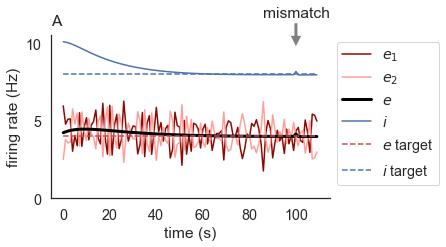

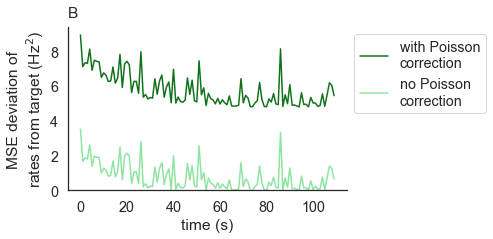

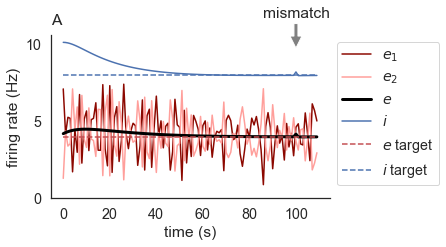

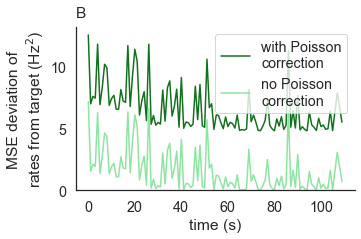

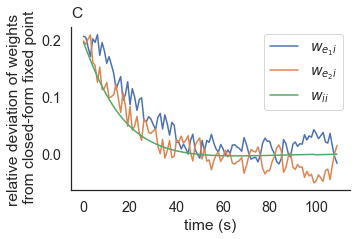

In [7]:

reRateT=np.mean(reRate[:,Nburn:,:],axis=(1,2))
re1RateT=np.mean(reRate[:,Nburn:,0],axis=1)
re2RateT=np.mean(reRate[:,Nburn:,1],axis=1)
riRateT=np.mean(riRate[:,Nburn:,0],axis=1)

AllRatesRate=np.block([[re1RateT],[re2RateT],[riRateT]]).T
r0Rate=np.block([np.zeros(Me)+r0e,np.zeros(Mi)+r0i])
MSERate=np.mean((AllRatesRate-r0Rate)**2,axis=1)
MSERatePoisson=MSERate+(1/(N*T))*(me*re1RateT+me*re2RateT+mi*riRateT)



plt.figure(figsize=(5,3))
plt.plot(np.arange(numtrials)*T/1000,1000*re1RateT,color=sns.color_palette('dark')[3], label=r'$e_1$')
plt.plot(np.arange(numtrials)*T/1000,1000*re2RateT,color=sns.color_palette('pastel')[3], label=r'$e_2$')
plt.plot(np.arange(numtrials)*T/1000,1000*reRateT,color=[0,0,0],linewidth=3, label=r'$e$')
plt.plot(np.arange(numtrials)*T/1000,1000*riRateT,color=sns.color_palette()[0], label=r'$i$')
plt.plot(np.arange(numtrials)*T/1000,1000*r0e+np.zeros(numtrials),'--',color=sns.color_palette()[3], label=r'$e$ target')
plt.plot(np.arange(numtrials)*T/1000,1000*r0i+np.zeros(numtrials),'--',color=sns.color_palette()[0], label=r'$i$ target')
plt.annotate('mismatch', xy=(MMTrial,9.75), xytext=(0, 30),textcoords='offset points',ha='center',
             arrowprops=dict(facecolor='gray', shrink=0.0),
             )
sns.despine()
plt.title('A',loc='left',pad=10)
plt.xlabel('time (s)')
plt.ylabel('firing rate (Hz)')
plt.yticks([0,5,10])
#plt.yticks([])
plt.ylim(bottom=0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('A',loc='left',pad=10)

plt.figure(figsize=(5,3))
plt.plot(np.arange(numtrials)*T/1000,1e6*MSERatePoisson,color=sns.color_palette('dark')[2],label='with Poisson\ncorrection')
plt.plot(np.arange(numtrials)*T/1000,1e6*MSERate,color=sns.color_palette('pastel')[2],label='no Poisson\ncorrection')
sns.despine()
plt.title('B',loc='left',pad=10)
plt.xlabel('time (s)')
plt.ylabel('MSE deviation of\n'+r'rates from target (Hz$^2$)')
plt.ylim(bottom=0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")


reRateT2=np.mean(rRate2[:,:2],axis=1)
re1RateT2=rRate2[:,0]
re2RateT2=rRate2[:,1]
riRateT2=rRate2[:,2]



AllRatesRate2=np.block([[re1RateT2],[re2RateT2],[riRateT2]]).T
r0Rate=np.block([np.zeros(Me)+r0e,np.zeros(Mi)+r0i])
MSERate2=np.mean((AllRatesRate2-r0Rate)**2,axis=1)
MSERatePoisson2=MSERate2+(1/(N*T))*(me*re1RateT2+me*re2RateT2+mi*riRateT2)


# Fixed pt weights
we1i0=(r0e-2*g*r0e*W0[0,0]-g*(Xe[0,0]))/(g*r0i)
we2i0=(r0e-2*g*r0e*W0[0,0]-g*(Xe[-1,0]))/(g*r0i)
wii0=(1/g)-(2*r0e*W0[2,0]+Xi0)/r0i


plt.figure(figsize=(5,3))
plt.plot(np.arange(numtrials)*T/1000,1000*re1RateT2,color=sns.color_palette('dark')[3], label=r'$e_1$')
plt.plot(np.arange(numtrials)*T/1000,1000*re2RateT2,color=sns.color_palette('pastel')[3], label=r'$e_2$')
plt.plot(np.arange(numtrials)*T/1000,1000*reRateT2,color=[0,0,0],linewidth=3, label=r'$e$')
plt.plot(np.arange(numtrials)*T/1000,1000*riRateT2,color=sns.color_palette()[0], label=r'$i$')
plt.plot(np.arange(numtrials)*T/1000,1000*r0e+np.zeros(numtrials),'--',color=sns.color_palette()[3], label=r'$e$ target')
plt.plot(np.arange(numtrials)*T/1000,1000*r0i+np.zeros(numtrials),'--',color=sns.color_palette()[0], label=r'$i$ target')
plt.annotate('mismatch', xy=(MMTrial,9.75), xytext=(0, 30),textcoords='offset points',ha='center',
             arrowprops=dict(facecolor='gray', shrink=0.0),
             )
sns.despine()
plt.title('A',loc='left',pad=10)
plt.xlabel('time (s)')
plt.ylabel('firing rate (Hz)')
plt.yticks([0,5,10])
plt.ylim(bottom=0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.figure(figsize=(5,3))
plt.plot(np.arange(numtrials)*T/1000,1e6*MSERatePoisson2,color=sns.color_palette('dark')[2],label='with Poisson\ncorrection')
plt.plot(np.arange(numtrials)*T/1000,1e6*MSERate2,color=sns.color_palette('pastel')[2],label='no Poisson\ncorrection')
sns.despine()
plt.title('B',loc='left',pad=10)
plt.xlabel('time (s)')
plt.ylabel('MSE deviation of\n'+r'rates from target (Hz$^2$)')
plt.ylim(bottom=0)
plt.legend()

#fig, axes = plt.subplots(figsize=(10, 7))

plt.figure(figsize=(5,3))
plt.plot((WRate2[:,0,2]-we1i0)/np.abs(we1i0),label=r'$w_{e_1i}$')
plt.plot((WRate2[:,1,2]-we2i0)/np.abs(we2i0),label=r'$w_{e_2i}$')
plt.plot((WRate2[:,2,2]-wii0)/np.abs(wii0),label=r'$w_{ii}$')
sns.despine()
plt.title('C',loc='left',pad=10)
plt.xlabel('time (s)')
plt.ylabel('relative deviation of weights\n from closed-form fixed point')
plt.legend()#bbox_to_anchor=(1,1), loc="upper left")
[]